# Usertype Patronage Behaviour (Bay-Area Bikeshare)
## James Funware West


## Investigation Overview

In this investigation, we will place our focus on different usertypes and their patronage behaviour of our bikeshare services. We will focus on their numbers,how they differ in duration of their trips and time of the day they take these trips. 


## Dataset Overview

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. The dataset is for February 2019.
The data can be gotten from the sources below :
- Website: http://www.bayareabikeshare.com/
- Systems Data Page: http://www.bayareabikeshare.com/open-data
- Data being shared: Trip, Station, Membership, Weather, Bike and Dock Availability

In [26]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [27]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('fordbikeshare_clean.csv', index_col= 0 )

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172885 entries, 0 to 172884
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   start_time               172885 non-null  object 
 1   end_time                 172885 non-null  object 
 2   start_station_name       172692 non-null  object 
 3   end_station_name         172692 non-null  object 
 4   user_type                172885 non-null  object 
 5   member_birth_year        172885 non-null  int64  
 6   member_gender            172885 non-null  object 
 7   bike_share_for_all_trip  172885 non-null  object 
 8   duration_min             172885 non-null  float64
 9   start_weekday            172885 non-null  object 
 10  time_period              172885 non-null  object 
 11  customer_age             172885 non-null  int64  
dtypes: float64(1), int64(2), object(9)
memory usage: 17.1+ MB


In [29]:
df['start_time'] = pd.to_datetime(df['start_time'])

In [30]:
#make this a ordered category
df['start_weekday'] = pd.Categorical(df['start_weekday'],
                                         ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
df['start_weekday'].unique()

['Thursday', 'Wednesday', 'Tuesday', 'Monday', 'Sunday', 'Saturday', 'Friday']
Categories (7, object): ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

## General Characteristics Of Users

We will explore the general characteristics of the users like : the gender and usertype proportion, the age distribution of the users.


## Gender Proportion
90.8% of the users are subscribers, while 9.2% are customers. Most of our users are subscribers and only a small number are customers.

In [31]:
# Getting the count for each usertype
usertype = df.user_type.value_counts()
usertype

Subscriber    156926
Customer       15959
Name: user_type, dtype: int64

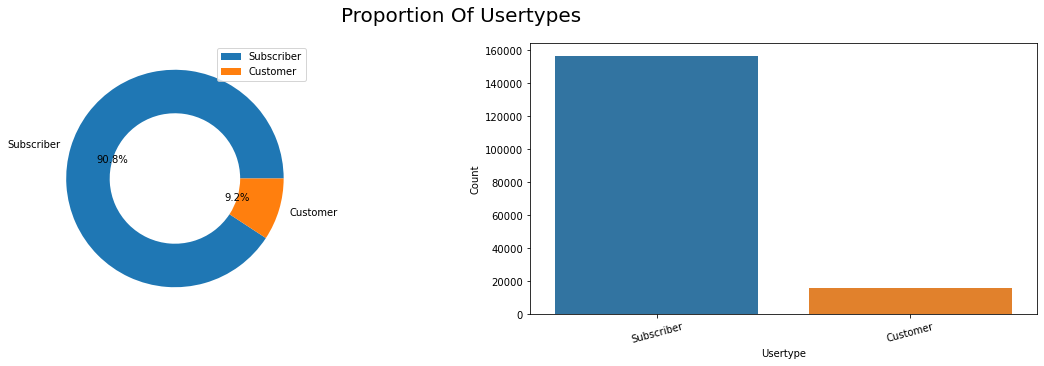

In [32]:
#making the plot
plt.figure(figsize = [20, 5])
plt.suptitle('Proportion Of Usertypes', fontsize = 20)

# pie chart on the left
plt.subplot(1,2,1)
usertype.plot.pie(autopct='%1.1f%%',wedgeprops = {'width' : 0.4})
plt.ylabel('')
plt.legend()

# bar chart on the right
plt.subplot(1,2,2)
sns.countplot(data= df, x = 'user_type', order = usertype.index)
plt.xlabel('Usertype')
plt.ylabel('Count')
plt.xticks(rotation = 15);

## Age Distribution
The distribution is right skewed, most of our customers are between the age 25 and 40. This might imply that most of our customers use our bikeshare services to get to work. Let's check out the number of trips for each hour of the day.

In [33]:
# Checking age distribution of the customers
df.customer_age.describe()

count    172885.000000
mean         36.939468
std           9.556899
min          21.000000
25%          30.000000
50%          35.000000
75%          42.000000
max          70.000000
Name: customer_age, dtype: float64

In [34]:
#drop rows where age is null
age = df.customer_age.dropna()

In [35]:
binedges = np.arange(age.min() - 2, age.max() +2, 2)

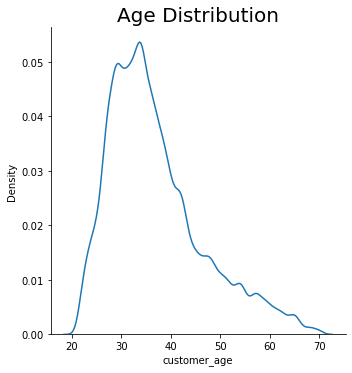

In [36]:
#making the plot
# kernel density estimate plot
sns.displot(x = age,kind = 'kde')
plt.title('Age Distribution', fontsize = 20);

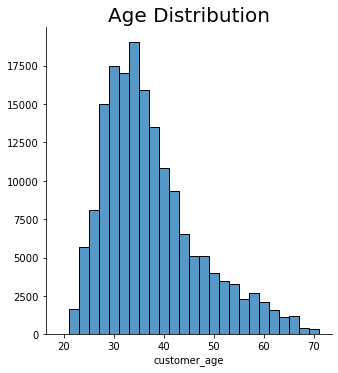

In [37]:
#making the plot
# histogram
sns.displot(x = age,kind = 'hist', bins = binedges)
plt.ylabel('')
plt.title('Age Distribution', fontsize = 20);

## Top 10 Busiest Stations
`Market St at 10th St.` and `San Francisco Caltrain Station 2  (Townsend St at 4th St)` ranks as the busiest stations. As we would expect, among the top 10 stations most of the users are subscribers but `San Francisco Ferry Building (Harry Bridges Plaza)` is quite popular among customers.

In [38]:
# getting the number of trips for each start station (top 10)
station = df.start_station_name.value_counts()
station = station.nlargest(10)
station

Market St at 10th St                                         3629
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3360
Berry St at 4th St                                           2901
Montgomery St BART Station (Market St at 2nd St)             2683
Powell St BART Station (Market St at 4th St)                 2572
San Francisco Caltrain (Townsend St at 4th St)               2537
San Francisco Ferry Building (Harry Bridges Plaza)           2481
Howard St at Beale St                                        2205
Steuart St at Market St                                      2166
Powell St BART Station (Market St at 5th St)                 2106
Name: start_station_name, dtype: int64

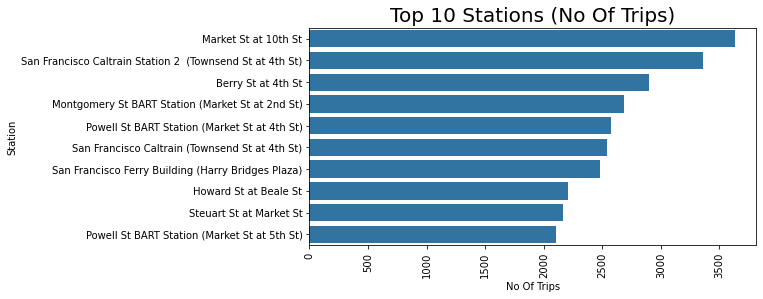

In [39]:
#Making the plot
plt.figure(figsize=[8,4])
sns.countplot(y = df.start_station_name, order = station.index, color = sns.color_palette()[0])
plt.xlabel('No Of Trips')
plt.xticks(rotation = 90)
plt.ylabel('Station')
plt.title('Top 10 Stations (No Of Trips)', fontsize = 20);

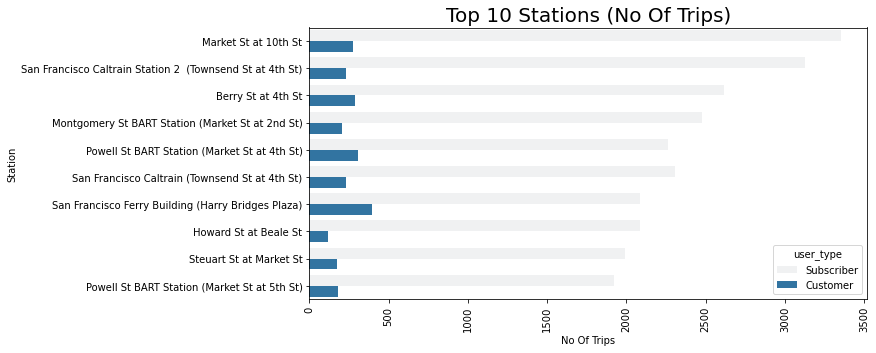

In [40]:
#Making the plot
plt.figure(figsize=[10,5])
sns.countplot(data = df,y = df.start_station_name, hue = 'user_type', order = station.index, 
              color = sns.color_palette()[0])
plt.xlabel('No Of Trips')
plt.xticks(rotation = 90)
plt.ylabel('Station')
plt.title('Top 10 Stations (No Of Trips)', fontsize = 20);

## Let's See How The Behaviour Of Usertypes Change..
Usertype behaviour changes with the time of day, day of the week. Let's see how these factors affect usertype behaviour.

## Trip Duration For Usertypes
Customers record longer trips, while subscribers record shorter trips, further analysis will show the time of the day and the day of the week these rides were taken.

In [41]:
# getting summary statistics for trip duration
df.groupby('user_type').duration_min.describe()

,count,mean,std,min,25%,50%,75%,max
user_type,,,,,,,,
Customer,15959.0,15.214410,10.230404,1.03,8.13,12.62,19.24,64.82
Subscriber,156926.0,9.864698,7.036867,1.02,5.20,8.15,12.43,64.97


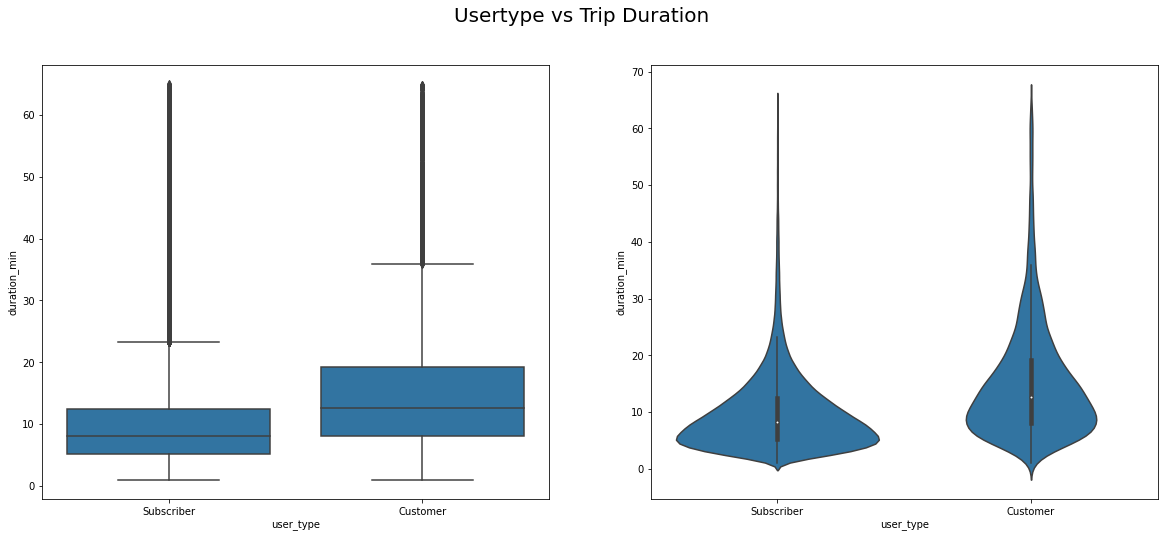

In [42]:
plt.figure(figsize=[20,8])
plt.subplot(1,2,1)
sns.boxplot(data = df, x = 'user_type', y = 'duration_min', color = sns.color_palette()[0])
plt.subplot(1,2,2)
sns.violinplot(data = df, x = 'user_type', y = 'duration_min', color = sns.color_palette()[0])
plt.suptitle('Usertype vs Trip Duration', fontsize = 20);

## Number Of Trips Booked Each Hour Of The Day
There is a spike during rush hour and this is significantly caused by subscribers, this inturn confirms that our subscribers use bikeshare for transit to work. Customer's activity remains relatively constant during the day and this goes to show they are for leisure rides.

In [43]:
# getting the start hour for each trip
df['start_hour'] = df.start_time.apply(lambda x: x.hour)

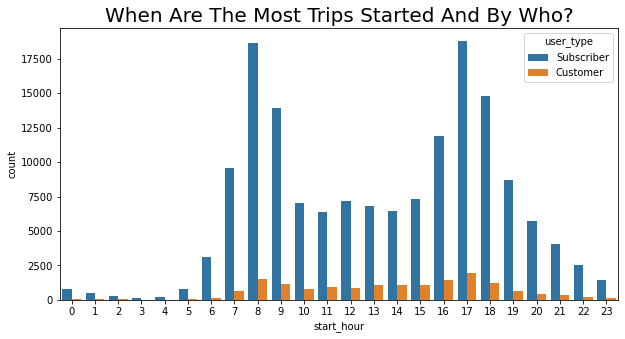

In [45]:
plt.figure(figsize=[10,5])
sns.countplot(data = df, x = 'start_hour', hue = 'user_type')
plt.title('When Are The Most Trips Started And By Who?', fontsize = 20);

## Duration Of Trips Booked Each Day Of The Week
The number of trips taken peaks during the week and sharply declines on Saturday and Sunday. Further analysis shows that the behaviour of customers remain relatively constant all week round, but subscribers show a change of behaviour during the weekend. This further reinforces the point that most subscribers use the service for work transit.



In [46]:
df.groupby(['time_period','start_weekday'])['duration_min'].mean().round(2)

time_period  start_weekday
Afternoon    Monday           10.95
             Tuesday          10.24
             Wednesday        10.02
             Thursday         10.45
             Friday           10.69
             Saturday         12.55
             Sunday           12.69
Evening      Monday            9.97
             Tuesday           9.84
             Wednesday         9.99
             Thursday         10.34
             Friday           10.15
             Saturday         11.02
             Sunday           10.29
Morning      Monday            9.92
             Tuesday           9.94
             Wednesday         9.86
             Thursday          9.96
             Friday           10.14
             Saturday         11.37
             Sunday           11.90
Name: duration_min, dtype: float64

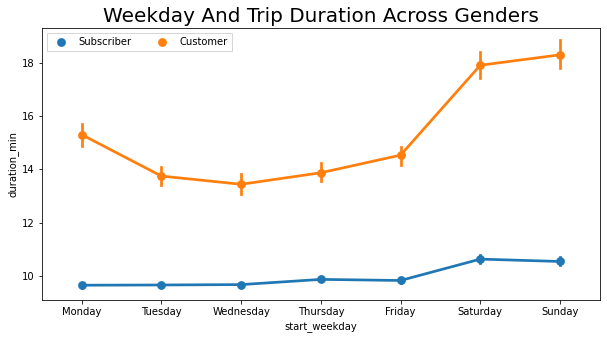

In [47]:
#Making the plot
plt.figure(figsize=[10,5])
sns.pointplot(data = df, x='start_weekday', y = 'duration_min',
            hue = 'user_type')
plt.title('Weekday And Trip Duration Across Genders', fontsize = 20)
plt.legend(loc = 0, ncol = 2, fancybox = False);

## Thank You !!!

In [1]:
! jupyter nbconvert bikeshare_explanation.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook bikeshare_explanation.ipynb to slides
[NbConvertApp] Writing 523655 bytes to bikeshare_explanation.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "/opt/conda/bin/jupyter-nbconvert", line 11, in <module>
    sys.exit(main())
  File "/opt/conda/lib/python3.6/site-packages/jupyter_core/application.py", line 266, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/opt/conda/lib/python3.6/site-packages/nbconvert/nbconvertapp.py", line 337, in start
    self.convert_notebooks()
  File "/opt/conda/lib/python3.6/site-packages/nbconvert/nbconvertapp.py", line 507, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "/opt/conda/lib/python3.6/site-packages